<img src='https://github.com/wekeo/ai4EM_MOOC/raw/04147f290cfdcce341f819eab7ad037b95f25600/img/ai4eo_logos.jpg' alt='Logo EU Copernicus WEkEO' align='center' width='100%'></img>


# WEKEO TRAINING

<div style="text-align: right"><i>  </i></div>

***
<center><h1> Ice Monitoring: Iceberg tracking in Antarctica </h1></center>

***
**General Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**General Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Then, in the top MENU, click on "Run" and select "Run All Above Selected Cell".<br>

**General Note 3**: To explore more (Python and R) content, there is our [**Jupyter Catalogue**](https://notebooks.apps.mercator.dpi.wekeo.eu/), and if you seek support, there are plenty of useful resources in our [**Help Center**](https://help.wekeo.eu/en/). Feel free to contact us using our [**live chat widget**](https://www.wekeo.eu/support) or asynchronously at [support@wekeo.eu](support@wekeo.eu) ! <br>

***

# Table of contents
1. [Introduction](#1.-Introduction)  
2. [Setting up the Python environment](#2.-Setting-up-the-Python-environment)  
   - [2.1 Required Python modules](#2.1-Required-Python-modules)  
3. [Data Access](#3.-Data-Access)  
   - [3.1 Presentation of the products used](#3.1-Presentation-of-the-products-used)  
   - [3.2 Retrieving the data](#3.2-Retrieving-the-Data)
        - [3.2.1 HDA API](#3.2.1-HDA-API)
        - [3.2.2 Earthkit](#3.2.2-Earthkit)
4. [Visualizing the A76 Iceberg with Sentinel-1 images](#4.-Visualizing-the-A76-Iceberg-with-Sentinel-1-images)  
5. [Trajectory of the iceberg](#5.-Trajectory-of-the-iceberg)  
   - [5.1 Data pre-processing with pandas](#5.1-Data-pre-processing-with-pandas)  
   - [5.2 Trajectory visualization](#5.2-Trajectory-visualization)  
6. [Potential drivers for iceberg drift](#6.-Potential-drivers-for-iceberg-drift)  
   - [6.1 Currents](#6.1-Currents)  
   - [6.2 Wind](#6.2-Wind)  
   - [6.3 Deeper look at Trajectories](#6.3-Deeper-look-at-Trajectories)  
7. [Conclusion](#7.-Conclusion)  
8. [Exercises](#8.-Exercises)



# 1. Introduction

[Go back to the "Table of contents"](#Table-of-contents)

Iceberg calving is the process by which large chunks of ice detach from the edges of glaciers or ice shelves and drift into the open ocean. This phenomenon occurs naturally as part of the mass balance of ice sheets, but it has gained increasing attention due to its potential links with climate change. Warmer ocean waters and shifting wind and current patterns can weaken the structural integrity of ice shelves, making calving events more frequent or more intense. The largest icebergs can measure hundreds of kilometers and remain afloat for years, affecting ecosystems and navigation.

The impacts of iceberg calving are significant. In the short term, they can modify local ocean circulation, freshwater distribution, and biological activity. Over longer timescales, increased calving may contribute to sea level rise if it reflects instability in grounded ice. Understanding where and when calving occurs — and how icebergs behave after detachment — is thus essential to monitor polar regions and anticipate environmental changes.

Thanks to satellite remote sensing, iceberg tracking has become more accessible and reliable. The WEkEO platform provides a unified access point to key datasets such as Sentinel-1 synthetic aperture radar (SAR) imagery, sea ice drift fields, ocean current models (e.g., CMEMS), and surface wind reanalyses (e.g., ERA5). These data allow researchers and operational users to detect calving events, track iceberg trajectories, and study the forces driving their motion across the Southern Ocean.

An iceberg’s drift is influenced by a combination of environmental factors, primarily ocean currents and wind, but also sea ice interactions, bathymetry, and its own mass and inertia. In this notebook, we will investigate some of these drivers by analyzing the trajectory of **iceberg A76**, one of the largest Antarctic icebergs in recent years. Calved from the Ronne Ice Shelf in May 2021, A76 offers an ideal case study for examining iceberg motion in relation to ocean and atmospheric forcing using open-access data from WEkEO.


| <img src="img/iceberg_OBS.jpeg" width="800"> | 
|:--:| 
|  Iceberg A76 *(Credits : Lauren Dauphin/NASA Earth Observatory)* |




# 2. Setting up the Python environment
[Go back to the "Table of contents"](#Table-of-contents)

## 2.1 Required Python modules
[Go back to the "Table of contents"](#Table-of-contents)

The Jupyter Notebook must be set up with all the necessary available tools from the Jupyter Notebook ecosystem. Here is the list of the modules we will be using in this exercise. They are pre-installed in the *wekeolab* kernel, which we recommend using.

| Module name | Description |
| :---: | :---|
| **numpy** | [NumPy](https://numpy.org/) is the fundamental package for scientific computing with Python and for managing ND-arrays. |
| **xarray** | [Xarray](http://xarray.pydata.org/en/stable/) is a very user friendly library for manipulating NetCDF files within Python. It introduces labels in the form of dimensions, coordinates and attributes on top of raw NumPy-like arrays, which allows for a more intuitive, more concise, and less error-prone developer experience. |
| **matplotlib** |[Matplotlib](https://matplotlib.org/) is a Python 2D plotting library which produces high quality figures. |
| **cartopy** |[Cartopy](https://scitools.org.uk/cartopy/docs/latest/) is a library for plotting maps and geospatial data analyses in Python. |
|**rasterio**|[Rasterio](https://rasterio.readthedocs.io/en/stable/)  is a Python library for reading, writing, and processing geospatial raster data, built on top of GDAL and designed to work seamlessly with NumPy.|
|**pyproj**|[Pyproj](https://pyproj4.github.io/pyproj/stable/)  is a Python library for accurate geospatial computations, including coordinate transformations and geodesic distance or direction calculations based on the PROJ library.|


📌 **Note :** In this notebook, we will make use of the **EarthKit** library to retrieve data from the Copernicus Marine Service (CMEMS). We describe below a quick manipulation to perform in order to be able to use it in this notebook:
*  Open a **terminal**.
*  Activate the wekeolab environment using the following command : `conda activate wekeolab`
*  Install Earthkit : `pip install earthkit`
*  Come back to the notebook and restart the kernel.

You should now be able to import Earthkit and all the other libraries by executing the next cell. For more information on how to use Earthkit in WEkEO, please visit the [dedicated article](https://help.wekeo.eu/en/articles/10628334-exploring-wekeo-earthkit-from-data-retrieval-to-visualization).

In [42]:
# Modules system
import warnings
warnings.filterwarnings('ignore')
import getpass
import os
from pathlib import Path

import zipfile

# Modules related to data retrieving
from hda import Client
import json

# Modules related to plot and EO data manipulation
import numpy as np
import pandas as pd
import xarray as xr
import rasterio
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from pyproj import Geod


import earthkit.data as ekd
import earthkit.plots
from earthkit.data import settings, cache

In [43]:
s = {"cache-policy": "user",
     "user-cache-directory": "./cache"}
settings.set(s) 
cache.directory()

'./cache'

In [44]:
# util functions

def normalize(u, v):
    norm = np.sqrt(u**2 + v**2)
    return u / norm, v / norm

# 3. Data Access

[Go back to the "Table of contents"](#Table-of-contents)


## 3.1. Presentation of the products used

[Go back to the "Table of contents"](#Table-of-contents)


From the WEkEO [Data Viewer](https://www.wekeo.eu/data?view=viewer), you can explore all the products available with many filters to select the region you are interested in, the parameters you want to study, etc.

This notebook will make use of **several data sources** : satellite images, gridded currents and wind observations, and iceberg tracking data. We describe below the datasets retrieved from WEkEO.

We are going to use **[Sentinel-1 SAR images](https://wekeo.copernicus.eu/data?view=dataset&dataset=EO:ESA:DAT:SENTINEL-1)**. Sentinel-1 is a radar satellite mission delivering reliable all-weather, day-and-night imaging. We are using the EW_GRDM_1SSH data, which is a Level-1 Ground Range Detected (GRD) product from the Extra Wide (EW) mode at medium resolution (MR). This data provides radar images with reduced speckle and square pixels but without phase information, making it suitable for clear, medium-resolution surface observations. We'll use this data to visualize the iceberg.


for the sea water **currents data**, we are going to use the product ["Global Total (COPERNICUS-GLOBCURRENT), Ekman and Geostrophic currents at the Surface and 15m"](https://wekeo.copernicus.eu/data?view=dataset&dataset=EO:MO:DAT:MULTIOBS_GLO_PHY_MYNRT_015_003) product. This product provides global ocean surface current data at two depths (0 m and 15 m), with hourly resolution. It includes both the geostrophic component, derived from satellite measurements of sea surface height, and the Ekman component, calculated from wind stress using ERA5 data. The dataset offers eastward (zonal) and northward (meridional) velocity fields on a regular ¼° grid, along with estimates of uncertainty.

Currents are generated by combining satellite-derived geostrophic flow with modeled wind-driven Ekman flow, giving a complete view of total surface velocity. The product is available as hourly, daily, and monthly averages. It was developed within CNES and CLS projects and further consolidated through the ESA-funded GlobCurrent initiative.

For the **wind data**, we are going to use the ["Global Ocean Monthly Mean Sea Surface Wind and Stress from Scatterometer and Model"](https://wekeo.copernicus.eu/data?view=dataset&dataset=EO%3AMO%3ADAT%3AWIND_GLO_PHY_CLIMATE_L4_MY_012_003). This product provides monthly global sea surface wind and stress data at a fine 0.25-degree resolution. It combines ECMWF ERA5 reanalysis data with corrections from multiple satellite scatterometer measurements to remove consistent errors. Along with the corrected wind and stress fields, it includes information on the applied corrections, variability, and the number of satellite observations used, making it reliable and detailed for ocean studies.

We show below a table summarizing the main characteristics of the products retrieved from WEKEO.


|  |  | | |
| :---: | :---:| :---:| :---:|
| **Product Name** | Sentinel-1 SAR | Global Total (COPERNICUS-GLOBCURRENT), Ekman and Geostrophic currents |Global Ocean Monthly Mean Sea Surface Wind and Stress|
| **Variables used** |- | uo, vo | eastward_wind, northward_wind|
| **Product identifier** |[EO:ESA:DAT:SENTINEL-1](https://wekeo.copernicus.eu/data?view=dataset&dataset=EO:ESA:DAT:SENTINEL-1) | [EO:MO:DAT:MULTIOBS_GLO_PHY_MYNRT_015_003:cmems_obs-mob_glo_phy-cur_my_0.25deg_P1D-m_202411](https://wekeo.copernicus.eu/data?view=dataset&dataset=EO:MO:DAT:MULTIOBS_GLO_PHY_MYNRT_015_003)|[EO:MO:DAT:WIND_GLO_PHY_CLIMATE_L4_MY_012_003:cmems_obs-wind_glo_phy_my_l4_P1M_202411](https://wekeo.copernicus.eu/data?view=dataset&dataset=EO%3AMO%3ADAT%3AWIND_GLO_PHY_CLIMATE_L4_MY_012_003)|
| **Temporal resolution** | 6 days revisit time |Daily | Monthly |
| **Spatial Resolution** | 20m x 40m in EW mode | 0.25° × 0.25° | 0.25° × 0.25°|
| **Temporal coverage** | since 2014 | 1 Jan 1993 to 21 Jul 2025 | 1 Jul 1994 to 1 Mar 2025|
||<img src="img/thb_S1.png" width="150">|<img src="img/thb_currents.png" width="150">|<img src="img/thb_winds.png" width="150">|


Additionaly, we are also going to use **iceberg tracking data** from the [US National Ice Center](https://usicecenter.gov/Products/AntarcIcebergs). This institute monitors and provides information on sea ice and icebergs, focusing on navigation safety. For iceberg tracking, USNIC uses satellite data and other sources to detect, monitor, and forecast iceberg positions and movements, helping maritime operations avoid hazards. It provides weekly datasets classifying all monitored icebergs in the Antarctic, we downloaded one file per month from June 2021 to December 2023 and stored in the `data/iceberg_tracking_m/` directory.


## 3.2. Retrieving the data

[Go back to the "Table of contents"](#Table-of-contents)

There are many ways to [download data in WEkEO](https://help.wekeo.eu/en/articles/6416936-how-to-download-wekeo-data). You can do it manually from the [Data Viewer](https://www.wekeo.eu/data?view=viewer), but here we will download data through Python, using the Harmonized Data Access (HDA) API provided by WEkEO. The HDA client provides a fully compliant Python3 client that can be used to search and download products using the Harmonized Data Access WEkEO API.

### 3.2.1 HDA API

[Go back to the "Table of contents"](#Table-of-contents)

In this section we show how to use the **HDA API**, which will work with most WEkEO datasets.


First you need to make sure you have a `.hdarc` saved in your root directory. Follow the method described [here](https://help.wekeo.eu/en/articles/6751608-how-to-use-the-hda-api-in-python#h_e1d774cae9). 

📌 **Note**: For the sake of convenience, you can run the following cell to generate it automatically:

In [45]:
# Modules related to data retrieving

# Default location expected by hda package
hdarc = Path(Path.home() / '.hdarc')

# Create it only if it does not already exists
if not hdarc.is_file():
    USERNAME = input('Enter your username: ')
    PASSWORD = getpass.getpass('Enter your password: ')

    with open(Path.home() / '.hdarc', 'w') as f:
        f.write(f'user:{USERNAME}\n')
        f.write(f'password:{PASSWORD}\n')

hda_client = Client()

You are now ready to download data. We write the API request, i.e. specify which product we want, which parameters, etc. The requests we have used to download the data can be found in the `data` folder, file `data/atm/S1_202104_req.json`. You can read it and modify it by right clicking on the file and then selecting "Open With -> Editor".

To write a new request, the easiest way is to select your data parameters in the [WEkEO Data Explorer](https://www.wekeo.eu/data), click on [`Show API request` (HowTo)](https://help.wekeo.eu/en/articles/6416936-how-to-download-wekeo-data#h_85849dcd7a), and copy/paste it into a file (or directly in a notebook cell).

<center>
    <img src="img/data_req.png" width="300">
</center>

Let's visualize our request.

In [46]:
# Loading request from json file (September S2 image)
with open('./data/S1_202104_req.json', 'r') as f:
    data = json.load(f)
data


{'dataset_id': 'EO:ESA:DAT:SENTINEL-1',
 'productIdentifier': 'S1A_EW_GRDM_1SSH_20210403T063440_20210403T063540_037282_04645D_A3B7_COG',
 'itemsPerPage': 200,
 'startIndex': 0}

Running the next cell will launch [**the download of the data (more details)**](https://help.wekeo.eu/en/articles/6751608-how-to-use-the-hda-api-in-python#h_605d4bdc05). Depending on the product and request, it may take some time. 

📌 **Note**: After downloading the data, you may need to **unzip** it using a terminal in order to access the files.


In [47]:
### Retrieve data
## Path to local data storage
output_path = 'data'

## Run the search with query
matches = hda_client.search(data)

## Print results
print(matches)


SearchResults[items=1,volume=171.7MB]


In [48]:
matches.download(output_path)

Let's now repeat this operation with the other request files and download all of the data we need for this notebook.

In [49]:
def get_data_wekeo(req_json, output_path, hda_client):
    print(f'Processing {req_json}')
    with open(req_json, 'r') as f:
        data = json.load(f)
    # print data
    print(data)
    matches = hda_client.search(data)
    ## Print results
    print(matches)
    #download
    matches.download(output_path)
    print('Done')

In [50]:
#retrieve second S1 image.
get_data_wekeo('data/S1_202105_req.json', output_path, hda_client)

Processing data/S1_202105_req.json
{'dataset_id': 'EO:ESA:DAT:SENTINEL-1', 'productIdentifier': 'S1A_EW_GRDM_1SSH_20210523T061813_20210523T061913_038011_047C80_6F53_COG', 'itemsPerPage': 200, 'startIndex': 0}
SearchResults[items=1,volume=166.1MB]



%|          | 0.00/166M [00:00<?, ?B/s]
%|▍         | 6.98M/166M [00:00<00:02, 73.2MB/s]
%|█         | 16.9M/166M [00:00<00:01, 91.1MB/s]
%|█▌        | 26.7M/166M [00:00<00:01, 96.4MB/s]
%|██▏       | 35.9M/166M [00:00<00:01, 94.9MB/s]
%|██▋       | 44.9M/166M [00:00<00:01, 94.1MB/s]
%|███▏      | 53.9M/166M [00:00<00:01, 93.4MB/s]
%|███▊      | 62.8M/166M [00:00<00:01, 93.4MB/s]
%|████▎     | 71.7M/166M [00:00<00:01, 92.5MB/s]
%|████▊     | 80.5M/166M [00:00<00:00, 92.6MB/s]
%|█████▍    | 89.4M/166M [00:01<00:00, 92.6MB/s]
%|█████▉    | 98.3M/166M [00:01<00:00, 93.0MB/s]
%|██████▍   | 108M/166M [00:01<00:00, 95.2MB/s] 
%|███████   | 117M/166M [00:01<00:00, 96.1MB/s]
%|███████▋  | 127M/166M [00:01<00:00, 98.2MB/s]
%|████████▏ | 137M/166M [00:01<00:00, 99.8MB/s]
%|████████▊ | 147M/166M [00:01<00:00, 100MB/s] 
%|█████████▍| 157M/166M [00:01<00:00, 101MB/s]
                                              

Done


### 3.2.2 Earthkit

[Go back to the "Table of contents"](#Table-of-contents)


As we are working with Copernicus Marine Service (CMEMS) data in this tutorial, we can use **Earthkit** to retrieve it. Earthkit allows us to streamline the data without having to download files in our WEkEO user file system, which could quickly be saturated.

Earthkit was set up at the beginning of this tutorial, and a dedicated article is available [here](https://help.wekeo.eu/en/articles/10628334-exploring-wekeo-earthkit-from-data-retrieval-to-visualization). Earthkit takes as argument the request traditionnally used with the HDA API, in the cells below we demonstrate how to retrieve the currents and winds datasets using the request files `data/currents_req.json` and `data/wind_req.json`.

📌 **Note :** To ease the data access in this tutorial, we recommend to specify only **one variable** per request.

In [52]:
def get_data_ekd(req_json, dataset_id):
    
    # first the data request is read just like with the HDA API
    print(f'Processing {req_json}')
    with open(req_json, 'r') as f:
        data = json.load(f)
    print(data)

    # then the Earthkit "from_source" function is used
    ds =  ekd.from_source("wekeo",
                          dataset_id,
                          request = data)

    # the result is converted to a standard xarray dataset
    return ds.to_xarray()

In [53]:
ds_cur = get_data_ekd("data/currents_req.json", "EO:MO:DAT:MULTIOBS_GLO_PHY_MYNRT_015_003:cmems_obs-mob_glo_phy-cur_my_0.25deg_P1D-m_202411")
ds_w = get_data_ekd("data/wind_req.json", "EO:MO:DAT:WIND_GLO_PHY_CLIMATE_L4_MY_012_003:cmems_obs-wind_glo_phy_my_l4_P1M_202411")

Processing data/currents_req.json
{'dataset_id': 'EO:MO:DAT:MULTIOBS_GLO_PHY_MYNRT_015_003:cmems_obs-mob_glo_phy-cur_my_0.25deg_P1D-m_202411', 'minimum_depth': 0, 'maximum_depth': 15, 'startdate': '2021-01-01T00:00:00.000Z', 'enddate': '2023-12-31T23:59:59.999Z', 'bbox': [-70, -89, 0, -40], 'variables': ['vo', 'uo'], 'itemsPerPage': 200, 'startIndex': 0}
Processing data/wind_req.json
{'dataset_id': 'EO:MO:DAT:WIND_GLO_PHY_CLIMATE_L4_MY_012_003:cmems_obs-wind_glo_phy_my_l4_P1M_202411', 'startdate': '2004-01-01T00:00:00.000Z', 'enddate': '2023-12-31T23:59:59.999Z', 'bbox': [-70, -80, 0, -40], 'variables': ['eastward_wind', 'northward_wind'], 'itemsPerPage': 200, 'startIndex': 0}


In [54]:
ds_cur

<xarray.Dataset> Size: 2GB
Dimensions:    (depth: 2, latitude: 196, longitude: 280, time: 1095)
Coordinates:
  * depth      (depth) int16 4B 0 15
  * latitude   (latitude) float32 784B -88.88 -88.62 -88.38 ... -40.38 -40.12
  * longitude  (longitude) float32 1kB -69.88 -69.62 -69.38 ... -0.375 -0.125
  * time       (time) datetime64[ns] 9kB 2021-01-01 2021-01-02 ... 2023-12-31
Data variables:
    vo         (time, depth, latitude, longitude) float64 961MB dask.array<chunksize=(1095, 2, 196, 280), meta=np.ndarray>
    uo         (time, depth, latitude, longitude) float64 961MB dask.array<chunksize=(1095, 2, 196, 280), meta=np.ndarray>
Attributes:
    institution:               CLS
    contact:                   servicedesk.cmems@mercator-ocean.eu
    Conventions:               CF-1.6
    title:                     Daily mean total surface and 15m velocities
    references:                Mulet S., Rio M.-H., Etienne H., Artana C., Ca...
    copernicusmarine_version:  2.1.1

# 4. Visualizing the A76 Iceberg with Sentinel-1 images

[Go back to the "Table of contents"](#Table-of-contents)


In this section, we are going to open and visualize the Sentinel-1 images that we have just downloaded. But first, as you can see in the `data/` directory, they have been downloaded as zip archives. We need to decompress the product to access the image data.

We have one image from April 2021, before the calving of the iceberg, and one from May 2021, shortly after.

In [55]:
import zipfile
with zipfile.ZipFile('data/S1A_EW_GRDM_1SSH_20210403T063440_20210403T063540_037282_04645D_A3B7_COG.zip', 'r') as zip_ref:
    zip_ref.extractall('data/')
with zipfile.ZipFile('data/S1A_EW_GRDM_1SSH_20210523T061813_20210523T061913_038011_047C80_6F53_COG.zip', 'r') as zip_ref:
    zip_ref.extractall('data/')

The Sentinel-1 data is ready! Let's open the actual image files and perform the visualization using **rasterio**.


In [56]:
# image filepaths
img_file_202104 = 'data/S1A_EW_GRDM_1SSH_20210403T063440_20210403T063540_037282_04645D_A3B7_COG.SAFE/measurement/s1a-ew-grd-hh-20210403t063440-20210403t063540-037282-04645d-001-cog.tiff'
img_file_202105 = 'data/S1A_EW_GRDM_1SSH_20210523T061813_20210523T061913_038011_047C80_6F53_COG.SAFE/measurement/s1a-ew-grd-hh-20210523t061813-20210523t061913-038011-047c80-001-cog.tiff'

In [57]:
with rasterio.open(img_file_202104) as src:
    img_202104 = src.read(1)

with rasterio.open(img_file_202105) as src:
    img_202105 = src.read(1)

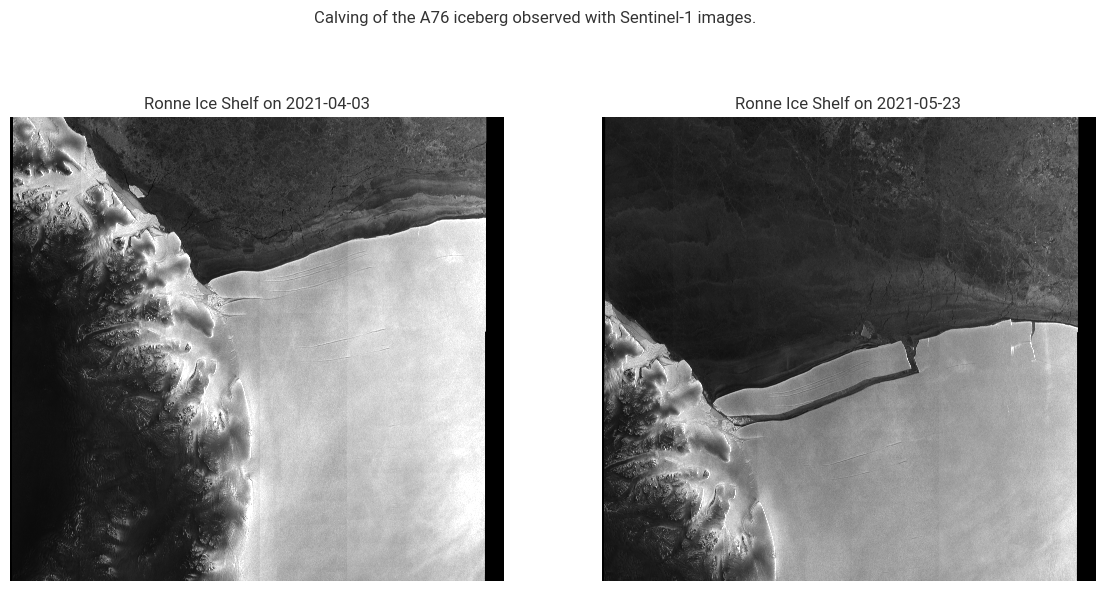

In [58]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,7))

ax1.imshow(img_202104, cmap='gray', vmin=0, vmax=1500)
ax1.invert_xaxis()
ax1.set_title('Ronne Ice Shelf on 2021-04-03')
ax1.set_axis_off()

ax2.imshow(img_202105, cmap='gray', vmin=0, vmax=1500)
ax2.invert_xaxis()
ax2.set_title('Ronne Ice Shelf on 2021-05-23')
ax2.set_axis_off()

plt.suptitle('Calving of the A76 iceberg observed with Sentinel-1 images.');

This iceberg is about 170 km long and 25 km wide. You can try to look for other Sentinel-1 images following this calving to observe the drift of the iceberg !

# 5. Trajectory of the iceberg

[Go back to the "Table of contents"](#Table-of-contents)

In this section, we are going to retrieve the trajectory of the A76 iceberg. As mentioned in the data presentation, we retrieved raw iceberg tracking data from the *US National Ice Center*, stored in the `iceberg_track_m` directory. 

## 5.1 Data pre-processing with pandas

[Go back to the "Table of contents"](#Table-of-contents)


Each file contains the positions of multiple icebergs at a given date. We are going to extract the trajectory of the A76 iceberg using the **pandas** library.

Let's first open one of them :

In [60]:
tracking_dir = 'data/iceberg_tracking_m'

In [61]:
df_ex = pd.read_csv(os.path.join(tracking_dir, 'AntarcticIcebergs_20210604.csv'), header=0, sep=',')
df_ex

,Iceberg,Length (NM),Width (NM),Latitude,Longitude,Remarks,Last Update
0,A23A,40,34,-75.62,-39.93,belle,6/4/2021
1,A63,11,3,-66.89,-57.07,belle,6/4/2021
2,A64,11,8,-67.71,-61.20,belle,6/4/2021
3,A69A,10,9,-67.51,-61.04,belle,6/4/2021
4,A69B,10,7,-67.18,-60.50,belle,6/4/2021
5,A70,8,5,-68.52,-60.71,belle,6/4/2021
6,A71,7,3,-68.92,-60.25,belle,6/4/2021
7,A74,30,18,-75.26,-26.45,weddw,6/4/2021
8,A76A,73,14,-75.14,-59.14,belle,6/4/2021
9,A76B,20,7,-74.99,-57.26,belle,6/4/2021


Among the several icebergs that are classified in the file, we can see there are 3 "A76" icebergs : A76A, A76B, A76C. The A76 iceberg actually split into several pieces at some point after its calving. We are going to monitor the biggest one : A76A.

In [62]:
df_a76 = []

# scanning for A76A iceberg in very file
for f in os.listdir(tracking_dir):
    df = pd.read_csv(os.path.join(tracking_dir, f), header=0, sep=',')
    df_a76.append(df[df['Iceberg']=='A76A'])
df_a76 = pd.concat(df_a76)

# setting the time index
df_a76['Last Update'] = pd.to_datetime(df_a76['Last Update'])
df_a76 = df_a76.set_index('Last Update').sort_index()
df_a76.to_csv('data/A76A_tracking.csv')

## 5.2 Trajectory visualization

[Go back to the "Table of contents"](#Table-of-contents)

We can now open the newly generated trajectory file :

In [63]:
df = pd.read_csv('data/A76A_tracking.csv')
df

,Last Update,Iceberg,Length (NM),Width (NM),Latitude,Longitude,Remarks
0,2021-06-04,A76A,73.0,14.0,-75.14,-59.14,belle
1,2021-07-02,A76A,73.0,14.0,-74.88,-58.82,belle
2,2021-08-06,A76A,73.0,14.0,-74.44,-59.33,belle
3,2021-09-10,A76A,73.0,14.0,-73.91,-59.27,belle
4,2021-10-01,A76A,73.0,14.0,-73.25,-59.42,belle
5,2021-11-05,A76A,73.0,14.0,-72.99,-59.33,belle
6,2021-12-03,A76A,73.0,14.0,-72.82,-59.15,belle
7,2022-01-07,A76A,73.0,14.0,-72.10,-58.26,belle
8,2022-02-04,A76A,73.0,14.0,-71.40,-56.85,belle
9,2022-03-04,A76A,73.0,14.0,-70.26,-56.34,belle


Let's now plot it on the map!

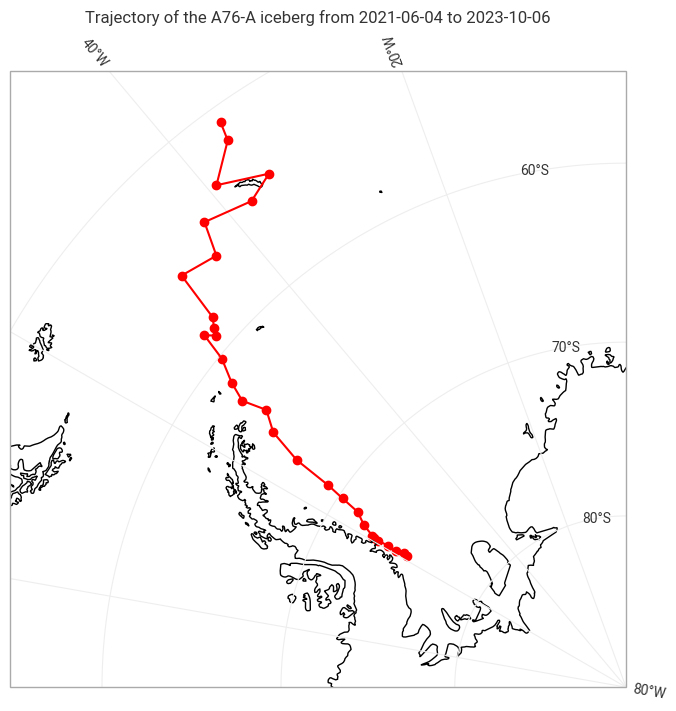

In [64]:
fig = plt.figure(figsize=(8, 8))

#setting up the map
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.set_extent([-60, -30, -90, -50], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.gridlines(draw_labels=True)

# plotting
ax.plot(df.Longitude, df.Latitude, transform=ccrs.PlateCarree(), color='r')
ax.scatter(df.Longitude, df.Latitude, transform=ccrs.PlateCarree(), color='r')
ax.set_title(f"Trajectory of the A76-A iceberg from {df.iloc[0]['Last Update']} to {df.iloc[-1]['Last Update']}");

We can see how far such objects can travel. Let's now try to identify possible drivers for this trajectory using currents and wind data.

# 6. Potential drivers for iceberg drift

[Go back to the "Table of contents"](#Table-of-contents)


## 6.1 Currents

[Go back to the "Table of contents"](#Table-of-contents)


Let’s now open the currents dataset we downloaded at the start of this tutorial.

In [65]:
ds_cur

<xarray.Dataset> Size: 2GB
Dimensions:    (depth: 2, latitude: 196, longitude: 280, time: 1095)
Coordinates:
  * depth      (depth) int16 4B 0 15
  * latitude   (latitude) float32 784B -88.88 -88.62 -88.38 ... -40.38 -40.12
  * longitude  (longitude) float32 1kB -69.88 -69.62 -69.38 ... -0.375 -0.125
  * time       (time) datetime64[ns] 9kB 2021-01-01 2021-01-02 ... 2023-12-31
Data variables:
    vo         (time, depth, latitude, longitude) float64 961MB dask.array<chunksize=(1095, 2, 196, 280), meta=np.ndarray>
    uo         (time, depth, latitude, longitude) float64 961MB dask.array<chunksize=(1095, 2, 196, 280), meta=np.ndarray>
Attributes:
    institution:               CLS
    contact:                   servicedesk.cmems@mercator-ocean.eu
    Conventions:               CF-1.6
    title:                     Daily mean total surface and 15m velocities
    references:                Mulet S., Rio M.-H., Etienne H., Artana C., Ca...
    copernicusmarine_version:  2.1.1

We have two depth levels: 0 m and 15 m. In this tutorial, we'll average the dataset over these depths to work with 3D data (time, latitude, and longitude). This also makes sense physically, as both layers likely interact with the iceberg.

Below, we show a simple map of ocean currents on a random date, with arrows indicating direction and color representing total sea water velocity.

Text(0.5, 1.0, 'Current field on 2022-03-04')

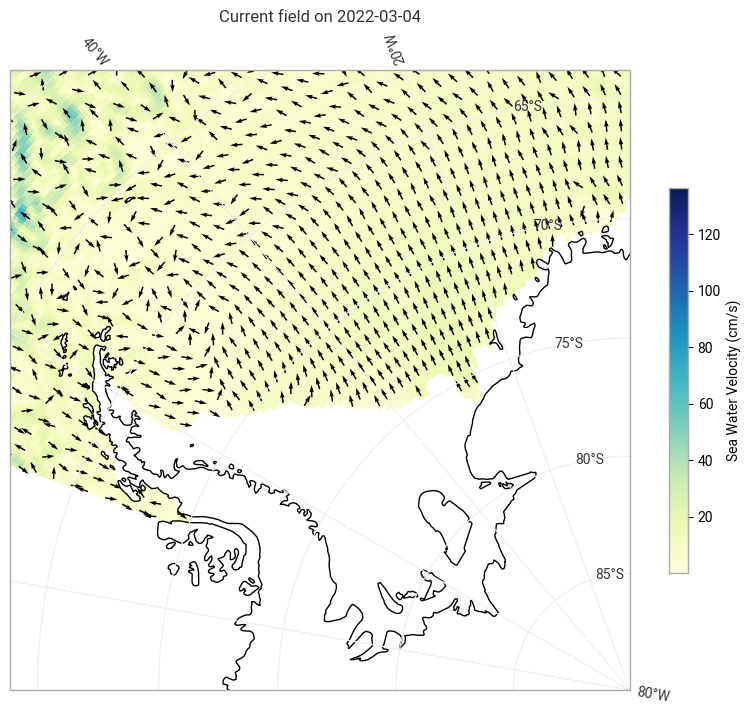

In [66]:
# first map

t_plot = '2022-03-04'  # arbitrarily chosen date

step_lat = 3
step_lon = 6
temp_map = ds_cur.sel(time=t_plot).mean(dim='depth')

u = temp_map.uo.data
v = temp_map.vo.data

# preparing normalized arrows
u, v = normalize(u ,v)

lon2d, lat2d = np.meshgrid(temp_map.longitude.data, temp_map.latitude.data)

# === Plot quiver ===
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.set_extent([-60, -30, -90, -60], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.gridlines(draw_labels=True)

im = ax.pcolor(temp_map.longitude.data,
               temp_map.latitude.data,
               np.sqrt(temp_map.uo.data**2 + temp_map.vo.data**2)*100,
               cmap='YlGnBu',
               transform=ccrs.PlateCarree())
cbar = plt.colorbar(im, shrink=0.5, label='Sea Water Velocity (cm/s)')

q = ax.quiver(lon2d[::step_lat, ::step_lon], lat2d[::step_lat, ::step_lon],
              u[::step_lat, ::step_lon], v[::step_lat, ::step_lon],
              scale=50,
              transform=ccrs.PlateCarree())

ax.set_title('Current field on %s' % t_plot)


Next, we’ll animate the iceberg’s trajectory alongside the ocean currents. Since the current dataset doesn’t extend far enough south, we'll begin the animation a few months after the calving event, once the iceberg reaches latitudes covered by the data.

For each frame, we'll plot the iceberg’s position at that date and display the currents averaged over the time interval between its current and previous positions.

In [67]:
# setting up steps to draw less arrows and enable better readability

step_lat = 6
step_lon = 6

for i in range(11, len(df)):

    start_date = df.iloc[i-1]['Last Update']
    end_date = df.iloc[i]['Last Update']

    # averaging over time interval and depth
    temp_map = ds_cur.sel(time = slice(start_date, end_date)).mean(dim='time').mean(dim='depth')
    total_velocity = np.sqrt(temp_map.uo.data**2 + temp_map.vo.data**2)*100
    
    u = temp_map.uo.data
    v = temp_map.vo.data

    # preparing normalized arrows
    u, v = normalize(u ,v)

    lon2d, lat2d = np.meshgrid(temp_map.longitude.data, temp_map.latitude.data)
    
    # === Plot quiver ===
    fig = plt.figure(figsize=(8, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([-60, -30, -65, -40])
    ax.add_feature(cfeature.COASTLINE)
    ax.gridlines()
    
    im = ax.pcolor(temp_map.longitude.data, temp_map.latitude.data, total_velocity, cmap='YlGnBu', vmin=0, vmax=50)
    cbar = plt.colorbar(im, shrink=0.5, label='Sea Water Velocity (cm/s)')
    
    q = ax.quiver(lon2d[::step_lat, ::step_lon], lat2d[::step_lat, ::step_lon],
                  u[::step_lat, ::step_lon], v[::step_lat, ::step_lon],
                  scale=40)
    
    ax.scatter(df.iloc[i]['Longitude'], df.iloc[i]['Latitude'], c='r')
    ax.plot(df.iloc[0:i+1]['Longitude'], df.iloc[0:i+1]['Latitude'], c='r', alpha=0.3)

    ax.set_title('%s' %str(end_date))

    plt.savefig('out/iceberg_vs_cur_%s.png' % str(end_date))
    plt.close()

In [68]:
# Import the modules for the animation
from PIL import Image
from pathlib import Path
from IPython.display import display, HTML

In [69]:
# Search image files
image_path = Path('out/')
images = sorted(image_path.glob('iceberg_vs_cur_*.png'))

# Load the images
images_files = [Image.open(file) for file in images]

# Save as a GIF
images_files[0].save(
    'out/animated_cur.gif', 
    save_all=True, 
    append_images=images_files[1:], 
    duration=500,  # Duration between frames in milliseconds
    loop=10         
)

In [70]:
# Visualisation
display(HTML('<img src="out/animated_cur.gif" width="800"/>')) 

Visually, the iceberg appears to follow the current vectors quite closely most of the time!

Now, let's do the same with **wind** data.

## 6.2 Wind

[Go back to the "Table of contents"](#Table-of-contents)


Let's open the wind dataset and perform the same animation as before.

In [71]:
ds_w

<xarray.Dataset> Size: 172MB
Dimensions:         (time: 240, latitude: 160, longitude: 280)
Coordinates:
  * latitude        (latitude) float32 640B -79.88 -79.62 ... -40.38 -40.12
  * longitude       (longitude) float32 1kB -69.88 -69.62 ... -0.375 -0.125
  * time            (time) datetime64[ns] 2kB 2004-01-01 ... 2023-12-01
Data variables:
    eastward_wind   (time, latitude, longitude) float64 86MB dask.array<chunksize=(240, 160, 280), meta=np.ndarray>
    northward_wind  (time, latitude, longitude) float64 86MB dask.array<chunksize=(240, 160, 280), meta=np.ndarray>
Attributes:
    Conventions:               CF-1.6, ACDD-1.3
    title:                      Global Ocean - Wind and Stress - Monthly - Fr...
    history:                   N/A
    references:                Copernicus Marine Service Product User Manual ...
    institution:               Royal Netherlands Meteorological Institute (KNMI)
    copernicusmarine_version:  2.1.1

In [72]:
step_lat = 5
step_lon = 10

for i in range(11, len(df)):

    start_date = df.iloc[i-1]['Last Update']
    end_date = df.iloc[i]['Last Update']
    
    temp_map = ds_w.sel(time = slice(start_date, end_date)).mean(dim='time')
    total_velocity = np.sqrt(temp_map.eastward_wind.data**2 + temp_map.northward_wind.data**2)

    u = temp_map.eastward_wind.data
    v = temp_map.northward_wind.data
    lon2d, lat2d = np.meshgrid(temp_map.longitude.data, temp_map.latitude.data)

    # preparing normalized arrows
    u, v = normalize(u ,v)

    # === Plot quiver ===
    fig = plt.figure(figsize=(8, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([-60, -30, -65, -40])
    ax.add_feature(cfeature.COASTLINE)
    ax.gridlines()

    im = ax.pcolor(temp_map.longitude.data, temp_map.latitude.data, total_velocity, cmap='YlGnBu', vmin=0, vmax=10)
    cbar = plt.colorbar(im, shrink=0.5, label='Wind Speed (m/s)')
    
    q = ax.quiver(lon2d[::step_lat, ::step_lon], lat2d[::step_lat, ::step_lon],
                  u[::step_lat, ::step_lon], v[::step_lat, ::step_lon], scale=40)

    ax.scatter(df.iloc[i-1]['Longitude'], df.iloc[i-1]['Latitude'], c='r', alpha=0.3)
    ax.scatter(df.iloc[i]['Longitude'], df.iloc[i]['Latitude'], c='r')
    ax.plot(df.iloc[0:i+1]['Longitude'], df.iloc[0:i+1]['Latitude'], c='r', alpha=0.3)

    ax.set_title('%s' %str(end_date))

    plt.tight_layout()
    plt.savefig('out/iceberg_vs_wind_%s.png' % str(end_date))
    plt.close()

In [73]:
# Search image files
image_path = Path('out/')
images = sorted(image_path.glob('iceberg_vs_wind_*.png'))

# Load the images
images_files = [Image.open(file) for file in images]

# Save as a GIF
images_files[0].save(
    'out/animated_wind.gif', 
    save_all=True, 
    append_images=images_files[1:], 
    duration=500,  # Duration between frames in milliseconds
    loop=10         
)

In [74]:
# Visualisation
display(HTML('<img src="out/animated_wind.gif" width="800"/>')) 

The wind blows mostly eastward in this region during this period, matching the general direction of the iceberg’s trajectory. In the next section, we’ll plot the successive directions side by side to better visualize possible correlations between wind, currents, and iceberg movement.

## 6.3 Deeper look at Trajectories

[Go back to the "Table of contents"](#Table-of-contents)


In order to plot the successive directions, several steps are needed:
*  Compute the iceberg's direction at each timestep. This is done by calculating the azimuth angle between the start and end coordinates, then using trigonometry to derive the eastward and northward components.
*  Determine the general direction of currents and winds in the area crossed by the iceberg. We do this by averaging the eastward and northward velocity components over a rectangle defined by the start and end points of each timestep.
*  Normalize all vectors so that arrows have a constant length.

In [40]:
ui = []
vi = []

uc = []
vc = []

uw = []
vw = []
# initalizing ellipsoid
geod = Geod(ellps="WGS84")

for i in range(12, len(df)):

    start_date = df.iloc[i-1]['Last Update']
    end_date = df.iloc[i]['Last Update']

    # selecting current and wind data over the time range
    cur_map = ds_cur.sel(time = slice(start_date, end_date)).mean(dim='time').mean(dim='depth')
    wind_map = ds_w.sel(time = slice(start_date, end_date)).mean(dim='time')

    lon1, lat1 = df.iloc[i-1]['Longitude'], df.iloc[i-1]['Latitude']
    lon2, lat2 = df.iloc[i]['Longitude'] , df.iloc[i]['Latitude']

    # computing iceberg movement components
    az, _, dist = geod.inv(lon1, lat1, lon2, lat2)   # azimuth angle and distance in meters
    u = dist * np.sin(np.radians(az))
    v = dist * np.cos(np.radians(az))

    # computing current and wind components
    lon_min_bb, lon_max_bb = sorted([lon1, lon2])
    lat_min_bb, lat_max_bb = sorted([lat1, lat2])

    u_cur = cur_map.sel(longitude=slice(lon_min_bb, lon_max_bb)).sel(latitude=slice(lat_min_bb, lat_max_bb)).mean(dim=['longitude', 'latitude']).uo.data
    v_cur = cur_map.sel(longitude=slice(lon_min_bb, lon_max_bb)).sel(latitude=slice(lat_min_bb, lat_max_bb)).mean(dim=['longitude', 'latitude']).vo.data

    u_wind = wind_map.sel(longitude=slice(lon_min_bb, lon_max_bb)).sel(latitude=slice(lat_min_bb, lat_max_bb)).mean(dim=['longitude', 'latitude']).eastward_wind.data
    v_wind = wind_map.sel(longitude=slice(lon_min_bb, lon_max_bb)).sel(latitude=slice(lat_min_bb, lat_max_bb)).mean(dim=['longitude', 'latitude']).northward_wind.data

    uc.append(u_cur)
    vc.append(v_cur)
    
    uw.append(u_wind)
    vw.append(v_wind)
    
    ui.append(u)
    vi.append(v)

# normalizing vectors
ui, vi = normalize(np.array(ui), np.array(vi))
uc, vc = normalize(np.array(uc), np.array(vc))
uw, vw = normalize(np.array(uw), np.array(vw))

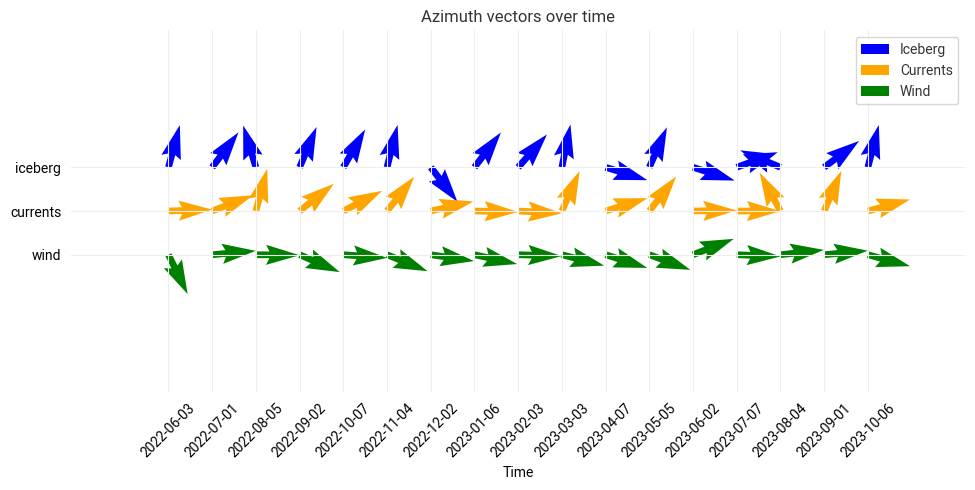

In [75]:
# Drawing the plot
steps = np.arange(len(ui))

plt.figure(figsize=(10, 5))
y_offset = {'iceberg': 0, 'currents': -1, 'wind': -2}

plt.quiver(df['Last Update'].iloc[12:], [y_offset['iceberg']]*len(steps), ui, vi, angles='xy', scale_units='xy', scale=1, color='blue', label='Iceberg')
plt.quiver(df['Last Update'].iloc[12:], [y_offset['currents']]*len(steps), uc, vc, angles='xy', scale_units='xy', scale=1, color='orange', label='Currents')
plt.quiver(df['Last Update'].iloc[12:], [y_offset['wind']]*len(steps), uw, vw, angles='xy', scale_units='xy', scale=1, color='green', label='Wind')

plt.yticks(list(y_offset.values()), list(y_offset.keys()))
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.title("Azimuth vectors over time")
plt.xlabel("Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We can visually observe that the iceberg's direction closely follows that of the currents, including abrupt changes, indicating that currents are likely the primary driving force behind its movement. At certain timesteps, some discrepancies appear, suggesting the influence of other factors—such as wind, bathymetry interactions, or obstacles.

# 7. Conclusion

[Go back to the "Table of contents"](#Table-of-contents)

In this notebook, we explored the drift of the A76-A iceberg, first by visualizing its calving using Sentinel-1 images, then analyzing actual tracking data. We demonstrated that currents are likely the main driving force behind its movement, as the iceberg’s direction closely correlates with the local current field.



# 8. Exercises

[Go back to the "Table of contents"](#Table-of-contents)

Here is a set of exercises we propose for you to go further into the analysis. There are 2 levels depending on how much Python code you need to write to answer the questions.


**Beginner**:

* In [Section 6.1](#6.1-Currents) we plotted the current field around the Antarctic on a random date, plot it on other dates to visualize the dynamics of the currents in the area. 

**Intermediate**:

* Now that you know the trajectory of theA76 iceberg, you can try to retrieve and visualize Sentinel-1 images of the iceberg at other locations. We recommend using the [Copernicus DataSpace Browser](https://browser.dataspace.copernicus.eu/) to easily choose the images.

* This notebook is dedicated to the A76-A iceberg. However, you can reproduce this analysis by selecting other iceberg in the tracking data. Note : you may have to download current and wind data on another area of interest in order to cover the iceberg's trajectory.


<div class="alert alert-block alert-success">
    <b>Congratulations !!</b><br>
  
--- 

##### **And thank you for your attention! :)** 
    
    
We hope you enjoyed this Jupyter Notebook training.

You now have plenty of tools to study iceberg monitoring. Feel free to re-use and adapt all the Python scripts of this notebook to your needs! 

This training course is over but we'd love to hear from you about how we could improve it (topics, tools, storytelling, format, speed etc). If you have any question, do not hesitate to contact us using our [**live chat widget**](https://www.wekeo.eu/support) or asynchronously at [support@wekeo.eu](support@wekeo.eu) !


# Additional Information
---

#### Compatible Data Science Toolkits

In [125]:
import pkg_resources; pkg_resources.get_distribution("hda").version

'2.21'

In [126]:
import xarray; print(xarray.__version__)

2025.1.1


#### Last Modified and Tested

In [123]:
from datetime import date; print(date.today())

2025-07-23


<img src='https://github.com/wekeo/ai4EM_MOOC/raw/04147f290cfdcce341f819eab7ad037b95f25600/img/ai4eo_logos.jpg' alt='Logo EU Copernicus WEkEO' align='center' width='100%'></img>